<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Tarea Módulo 02

### Instrucciones

* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scriptsm, etc.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `m02_homework_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Claudia Alvarez Latuz

__Rol__: 201610006-7

## Ejercicio 1: Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de red, green, blue) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

### Instalación de librerías

Lo primero es instalar la libreria `Pillow` e importar las librerías que se utilizarán. Para la instalación basta con ejecutar el siguiente comando en tu terminal:

```bash
conda install -n mat281 pillow
```

El código anterior instala la librería `pillow` en el entorno virtual `mat281` (el nombre del archivo `environment.yml` disponibilizado en el repositorio del curso).

In [1]:
import os
import numpy as np
from PIL import Image

Abrir una imagen es tan fácil como

In [2]:
gatito = Image.open(os.path.join("images", "gatito.png"))

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

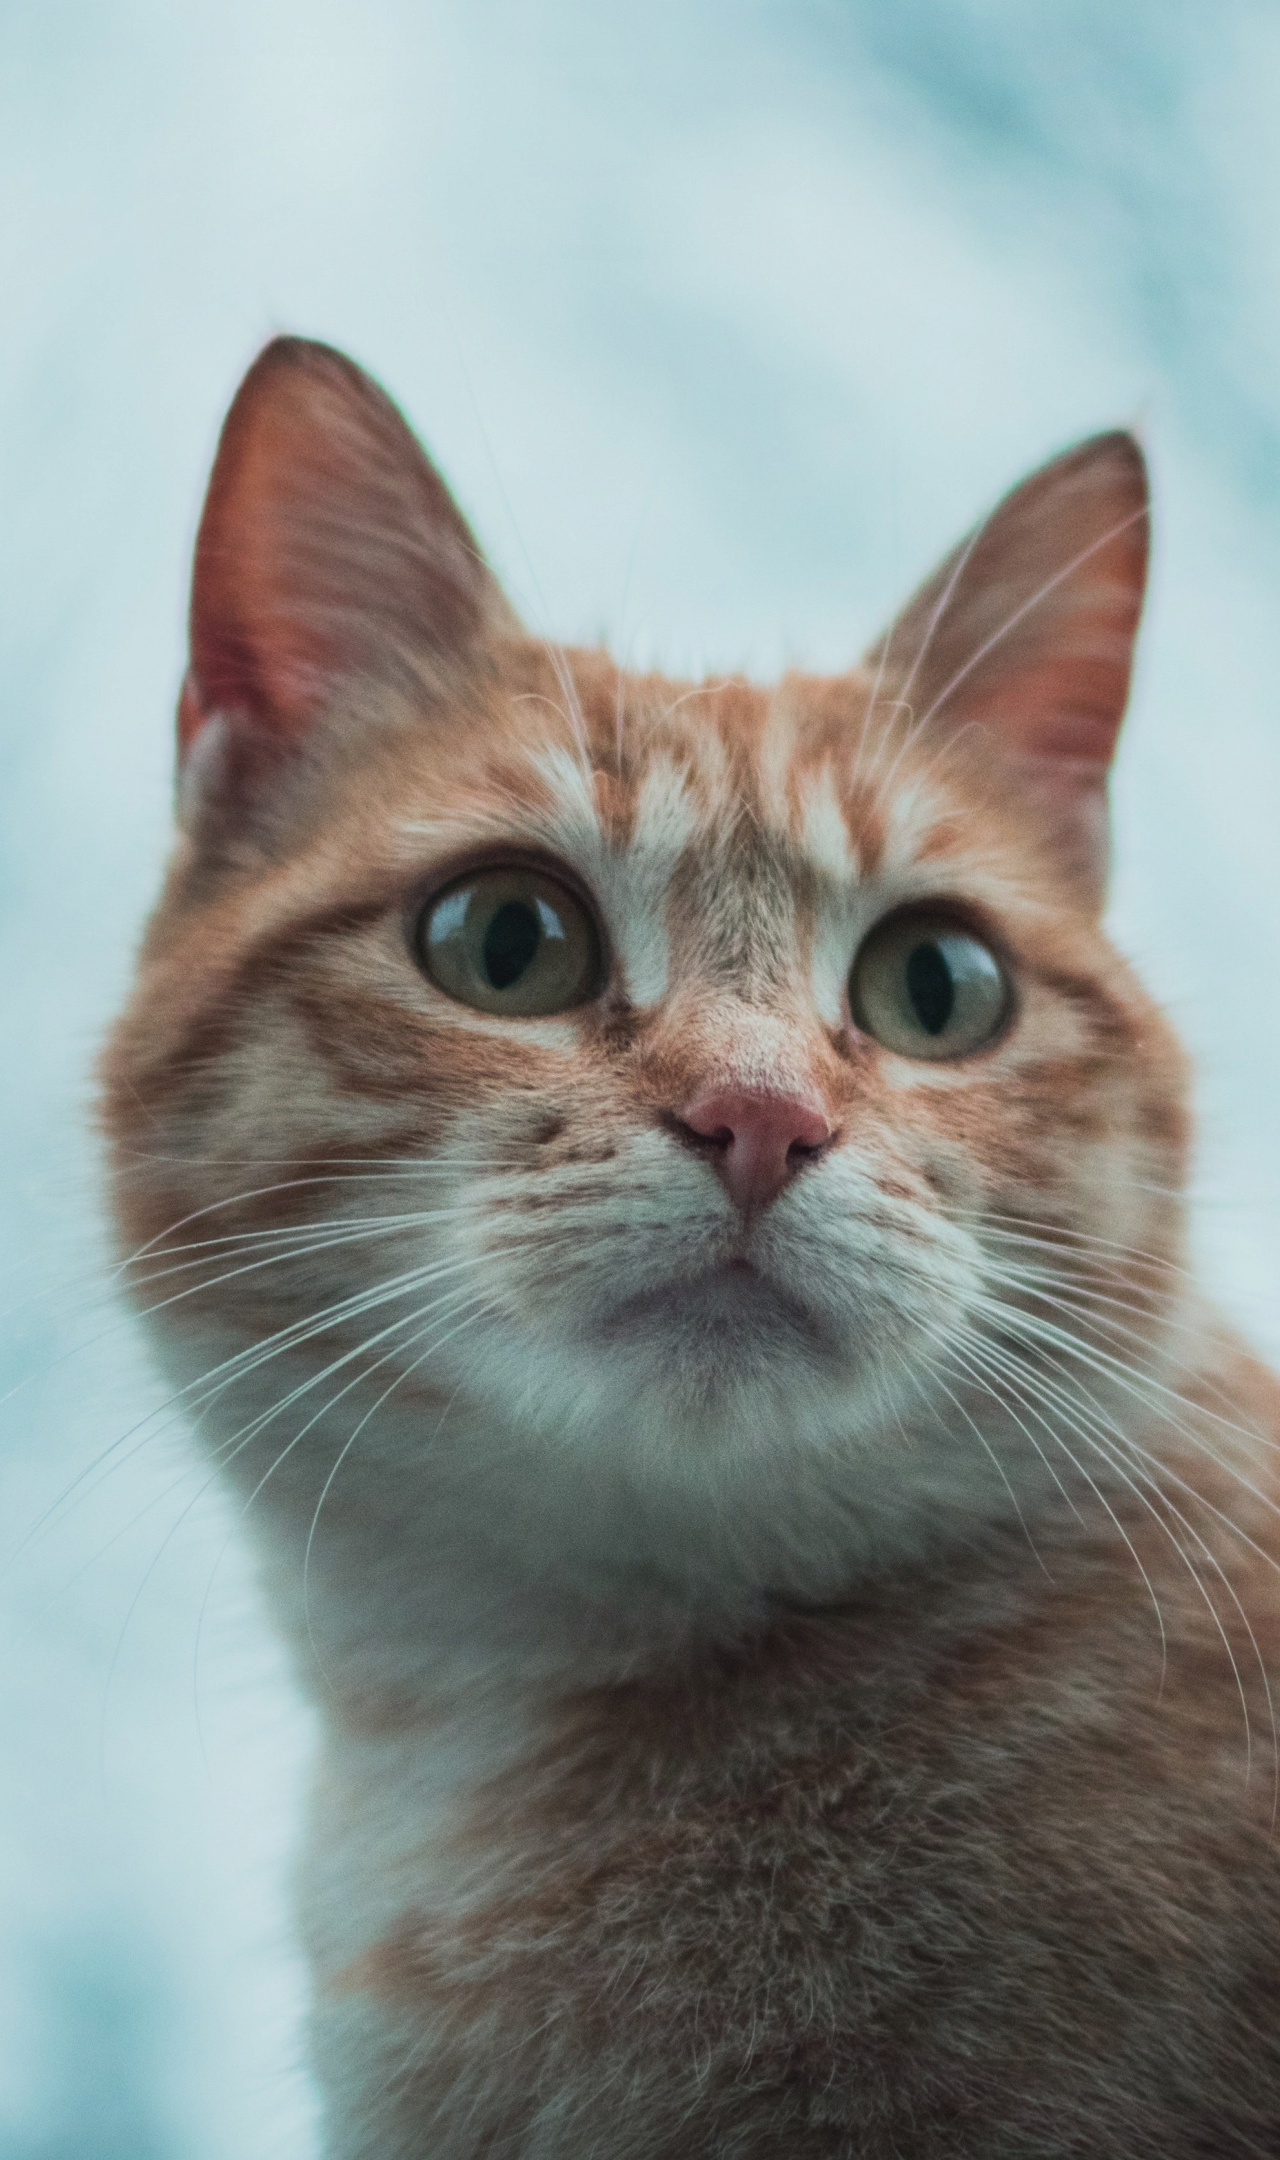

In [4]:
gatito

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### Encontrando la imagen oculta (35 pts)

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1. Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list = list()

2. Iterar por cada uno de los canales RGB y en cada iteración:
    * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar. 
        - No iterar por filas y columnas.
        - Utilizar la operación módulo `%`. 
        - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
    * Escalar `secret_aux` a valores 0 y 255.
    * Cambiar el `dtype` de `secret_aux` a `np.uint8`.
        - Utilize el méteodo `astype()`.
    * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

In [7]:
for channel in range(3):
    secret_aux = np.zeros([2160, 1280])+ gatito_np[:, : ,channel]%2
    secret_aux = secret_aux * 255     
    secret_aux = secret_aux.astype(np.uint8)
    secret_list.append(secret_aux)

In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


3. Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]),axis=1)
secret_np.shape

(2160, 3840)

4. Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np, mode="L")

Ahora puedes ver el resultado!

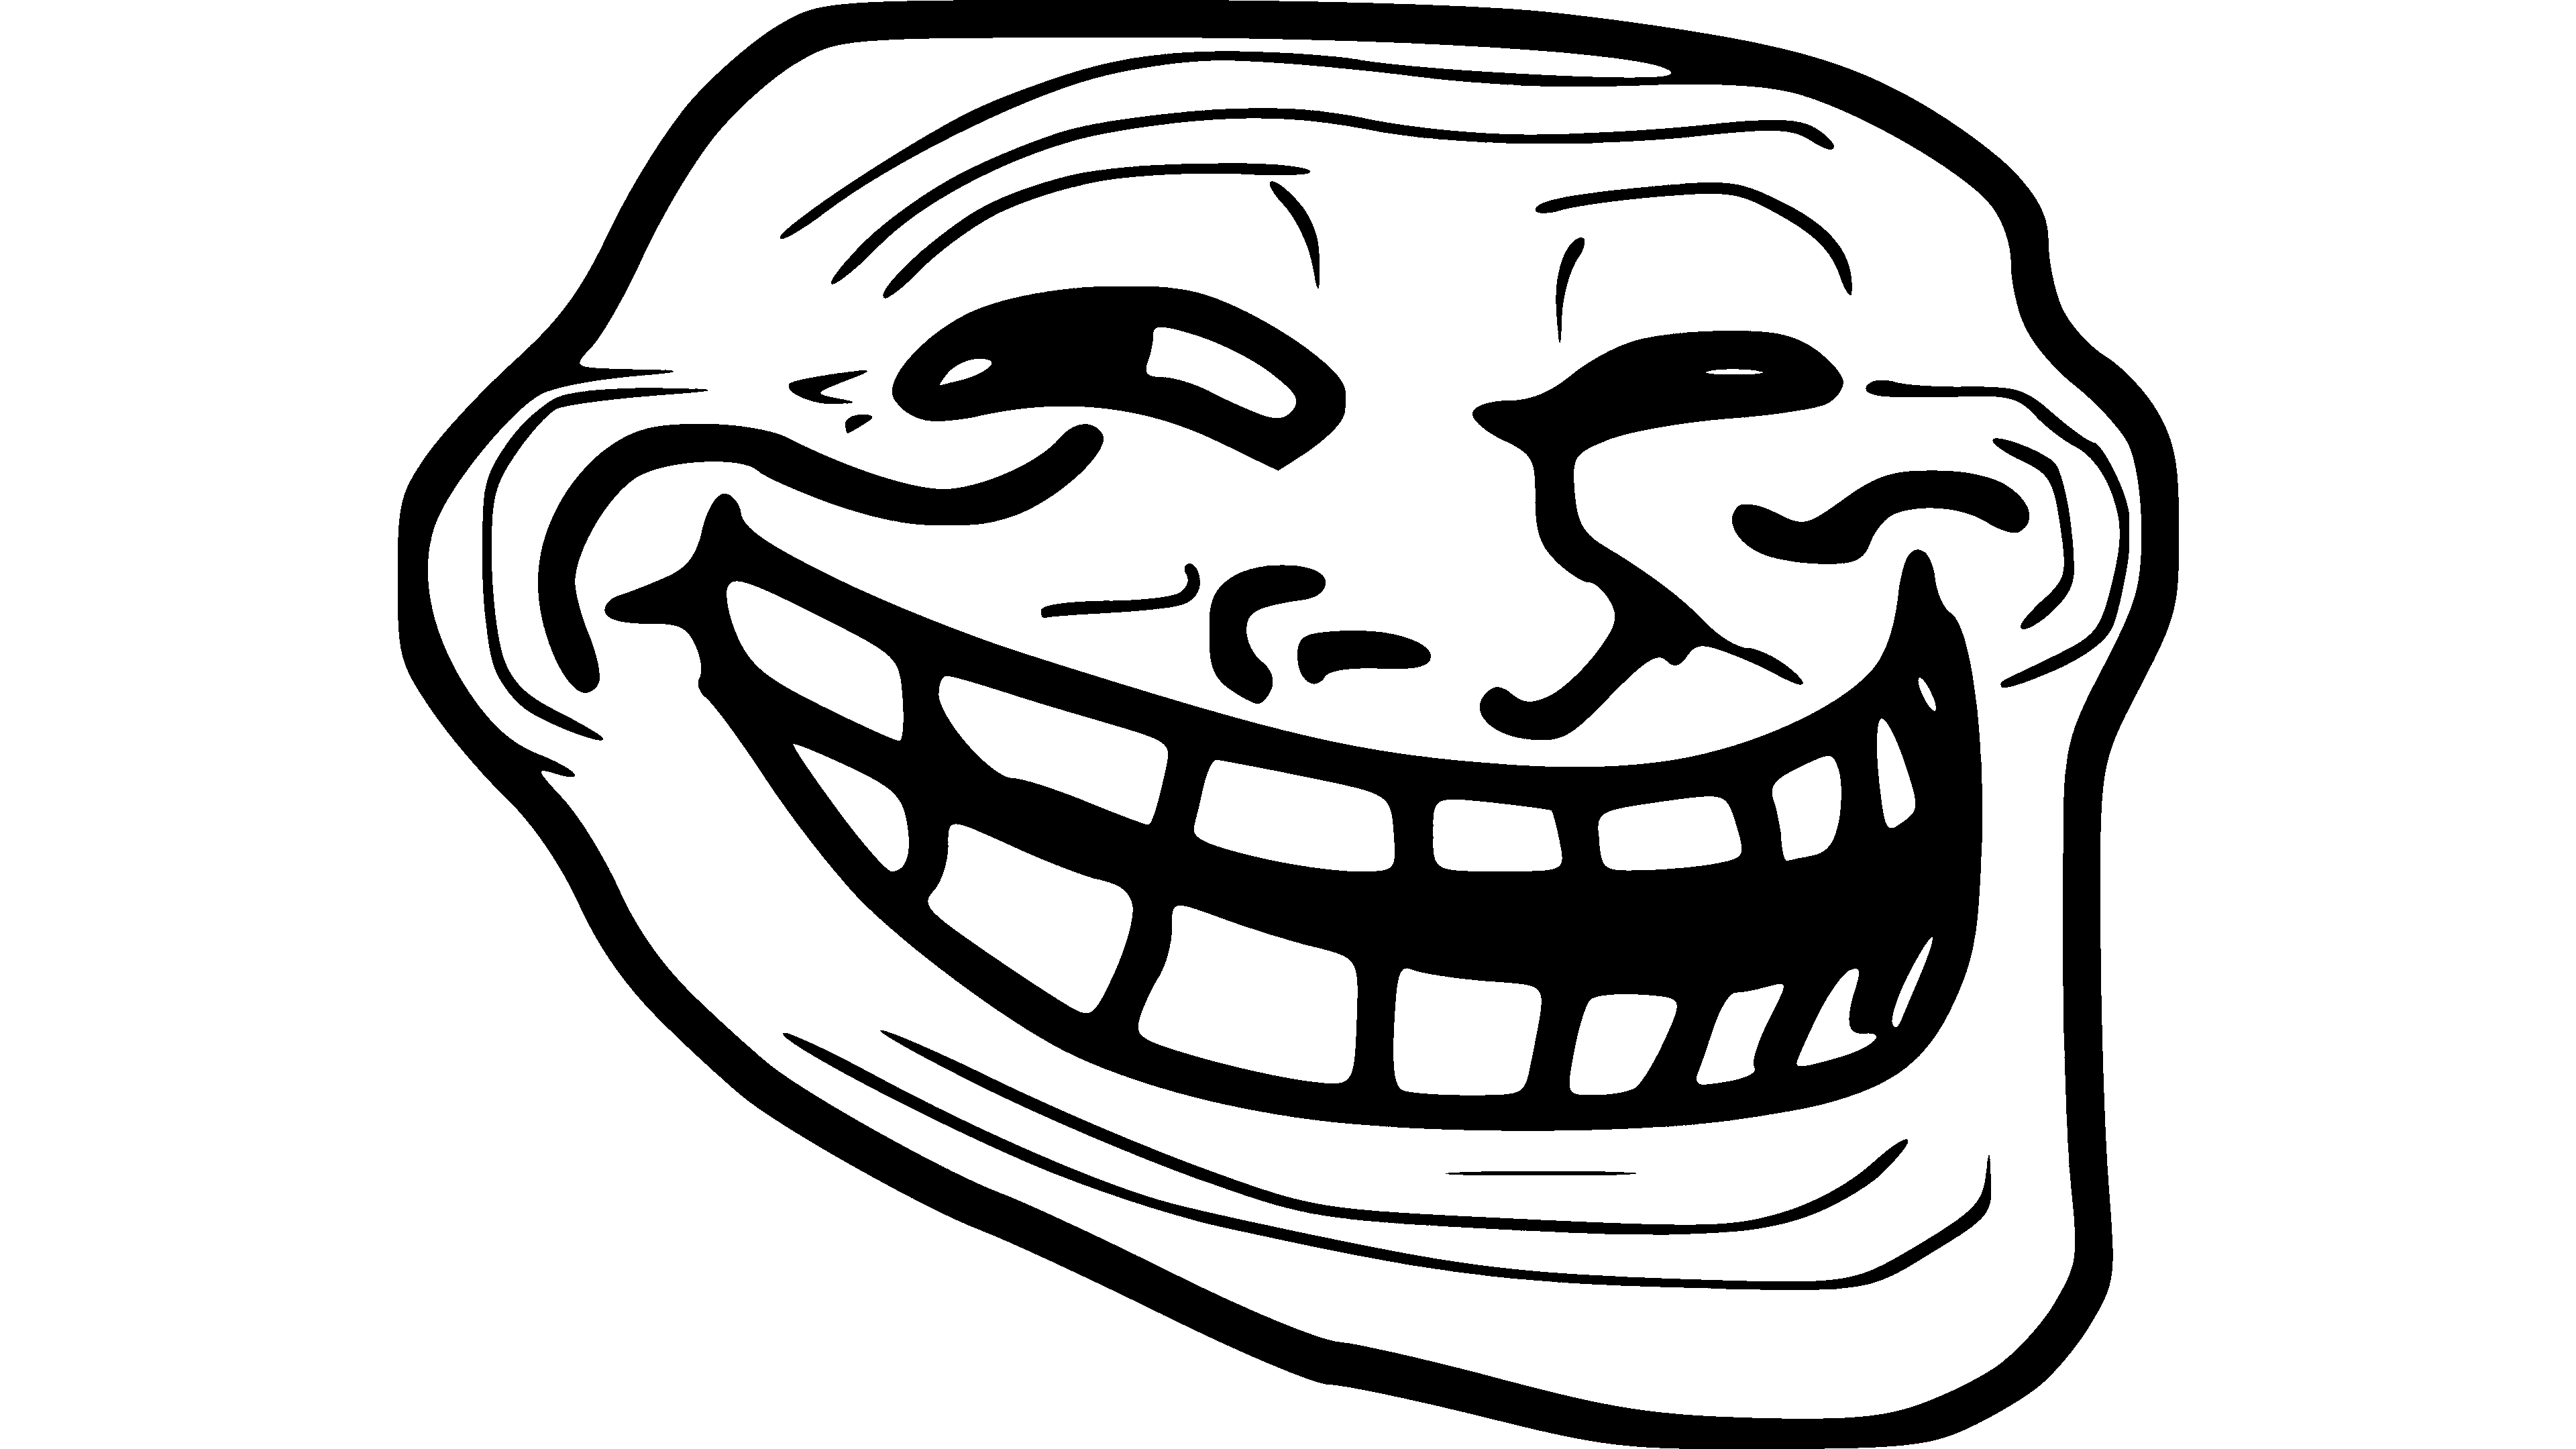

In [13]:
secret_img

### Escondiendo una nueva imagen (25 pts)

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

In [14]:
secret_np.shape

(2160, 3840)

1. Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [15]:
my_img = Image.open(os.path.join("images", "black_and_white_example.jpg"))

2. Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [16]:
my_img_np = np.array(my_img)
print(my_img_np.shape)

(2160, 3840)


3. Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [17]:
umbral = 20
my_img_np_aux = ((my_img_np>umbral)*1).astype(np.uint8)
my_img_np_aux.dtype

dtype('uint8')

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

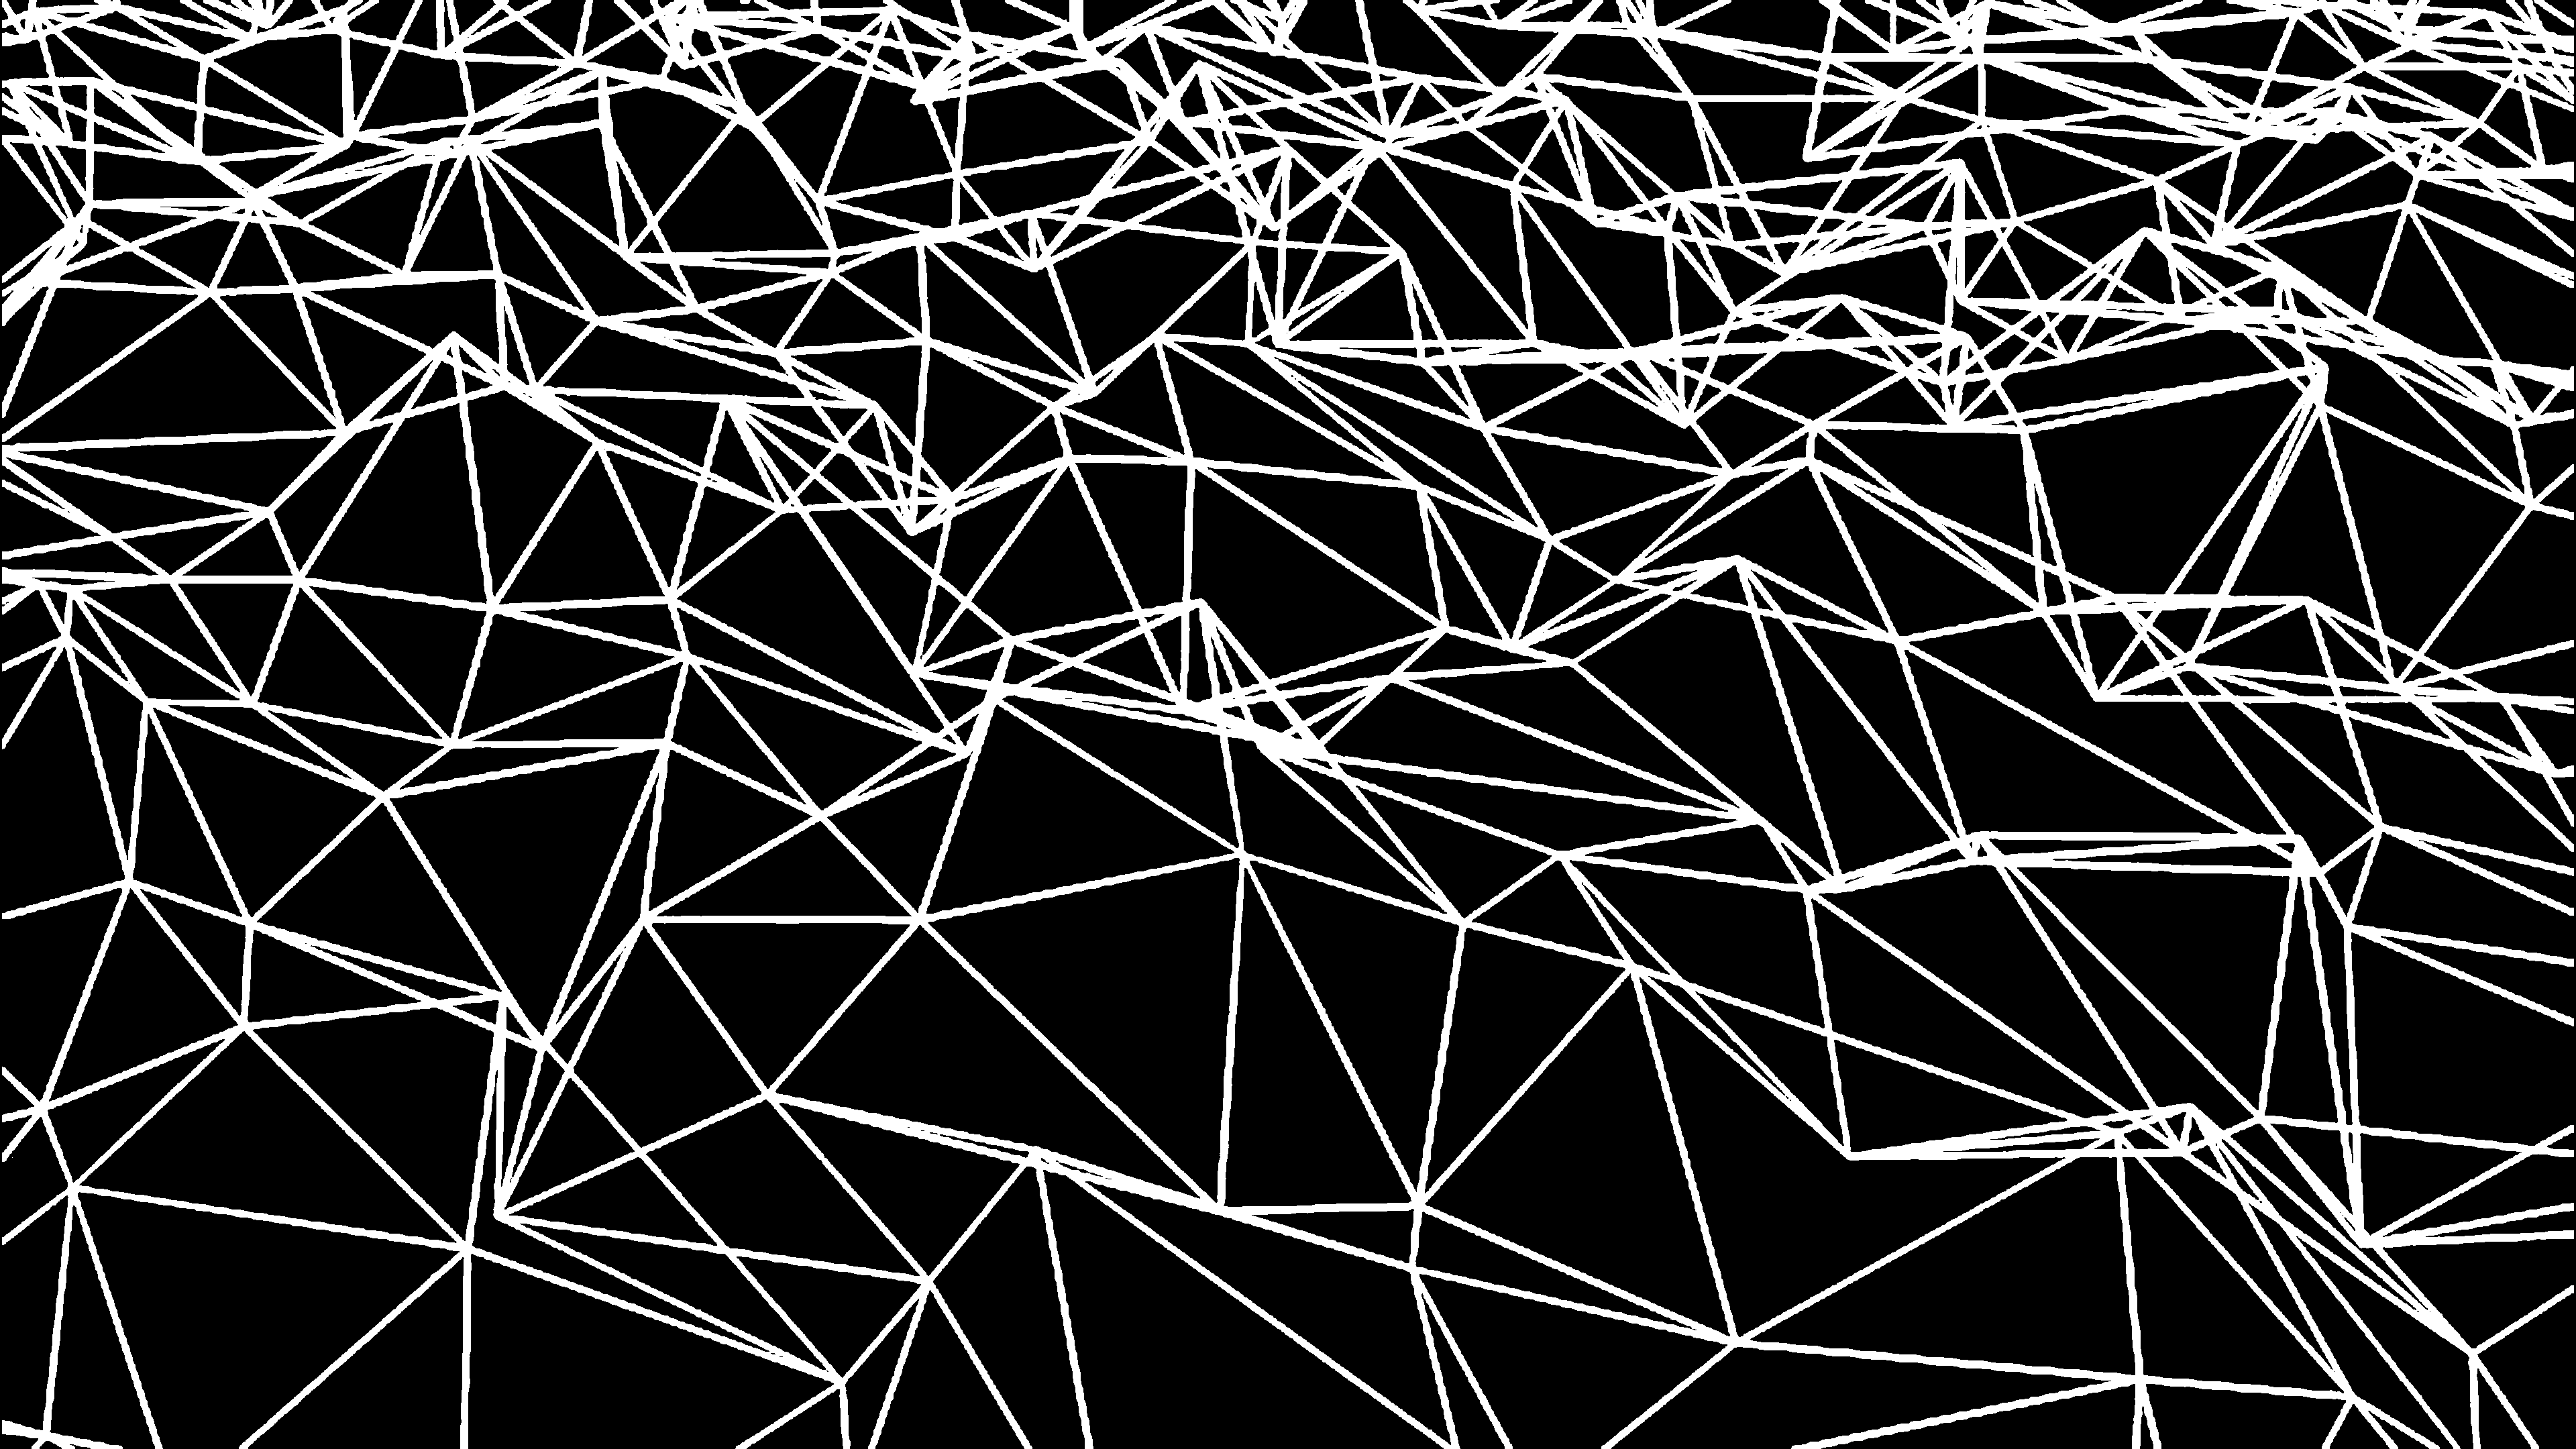

In [18]:
Image.fromarray(my_img_np_aux * 255)

4. Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [19]:
my_img_split = np.hsplit(my_img_np_aux,3)

Revisa utilizando la siguiente iteración.

In [20]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


5. La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [21]:
cat = Image.open(os.path.join("images", "gatito_original.png"))
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


6. Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar.

In [22]:
cat_np += cat_np%2

7. Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [23]:
for channel in range(3):
    cat_np[:,:,channel] += my_img_split[channel]

8. Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [24]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save(os.path.join("images","my_secret.png"))

9. Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte. 

In [25]:
def imagenception(filepath):
    secret = Image.open(filepath)
    secret_np = np.array(secret)
    secret_list = list()
    for channel in range(3):
        secret_aux = np.zeros([2160, 1280])+ secret_np[:, : ,channel]%2
        secret_aux = secret_aux * 255     
        secret_aux = secret_aux.astype(np.uint8)
        secret_list.append(secret_aux)
    secret_np = np.concatenate((secret_list[0],secret_list[1],secret_list[2]),axis=1)
    secret_img = Image.fromarray(secret_np, mode="L")
    return secret_img

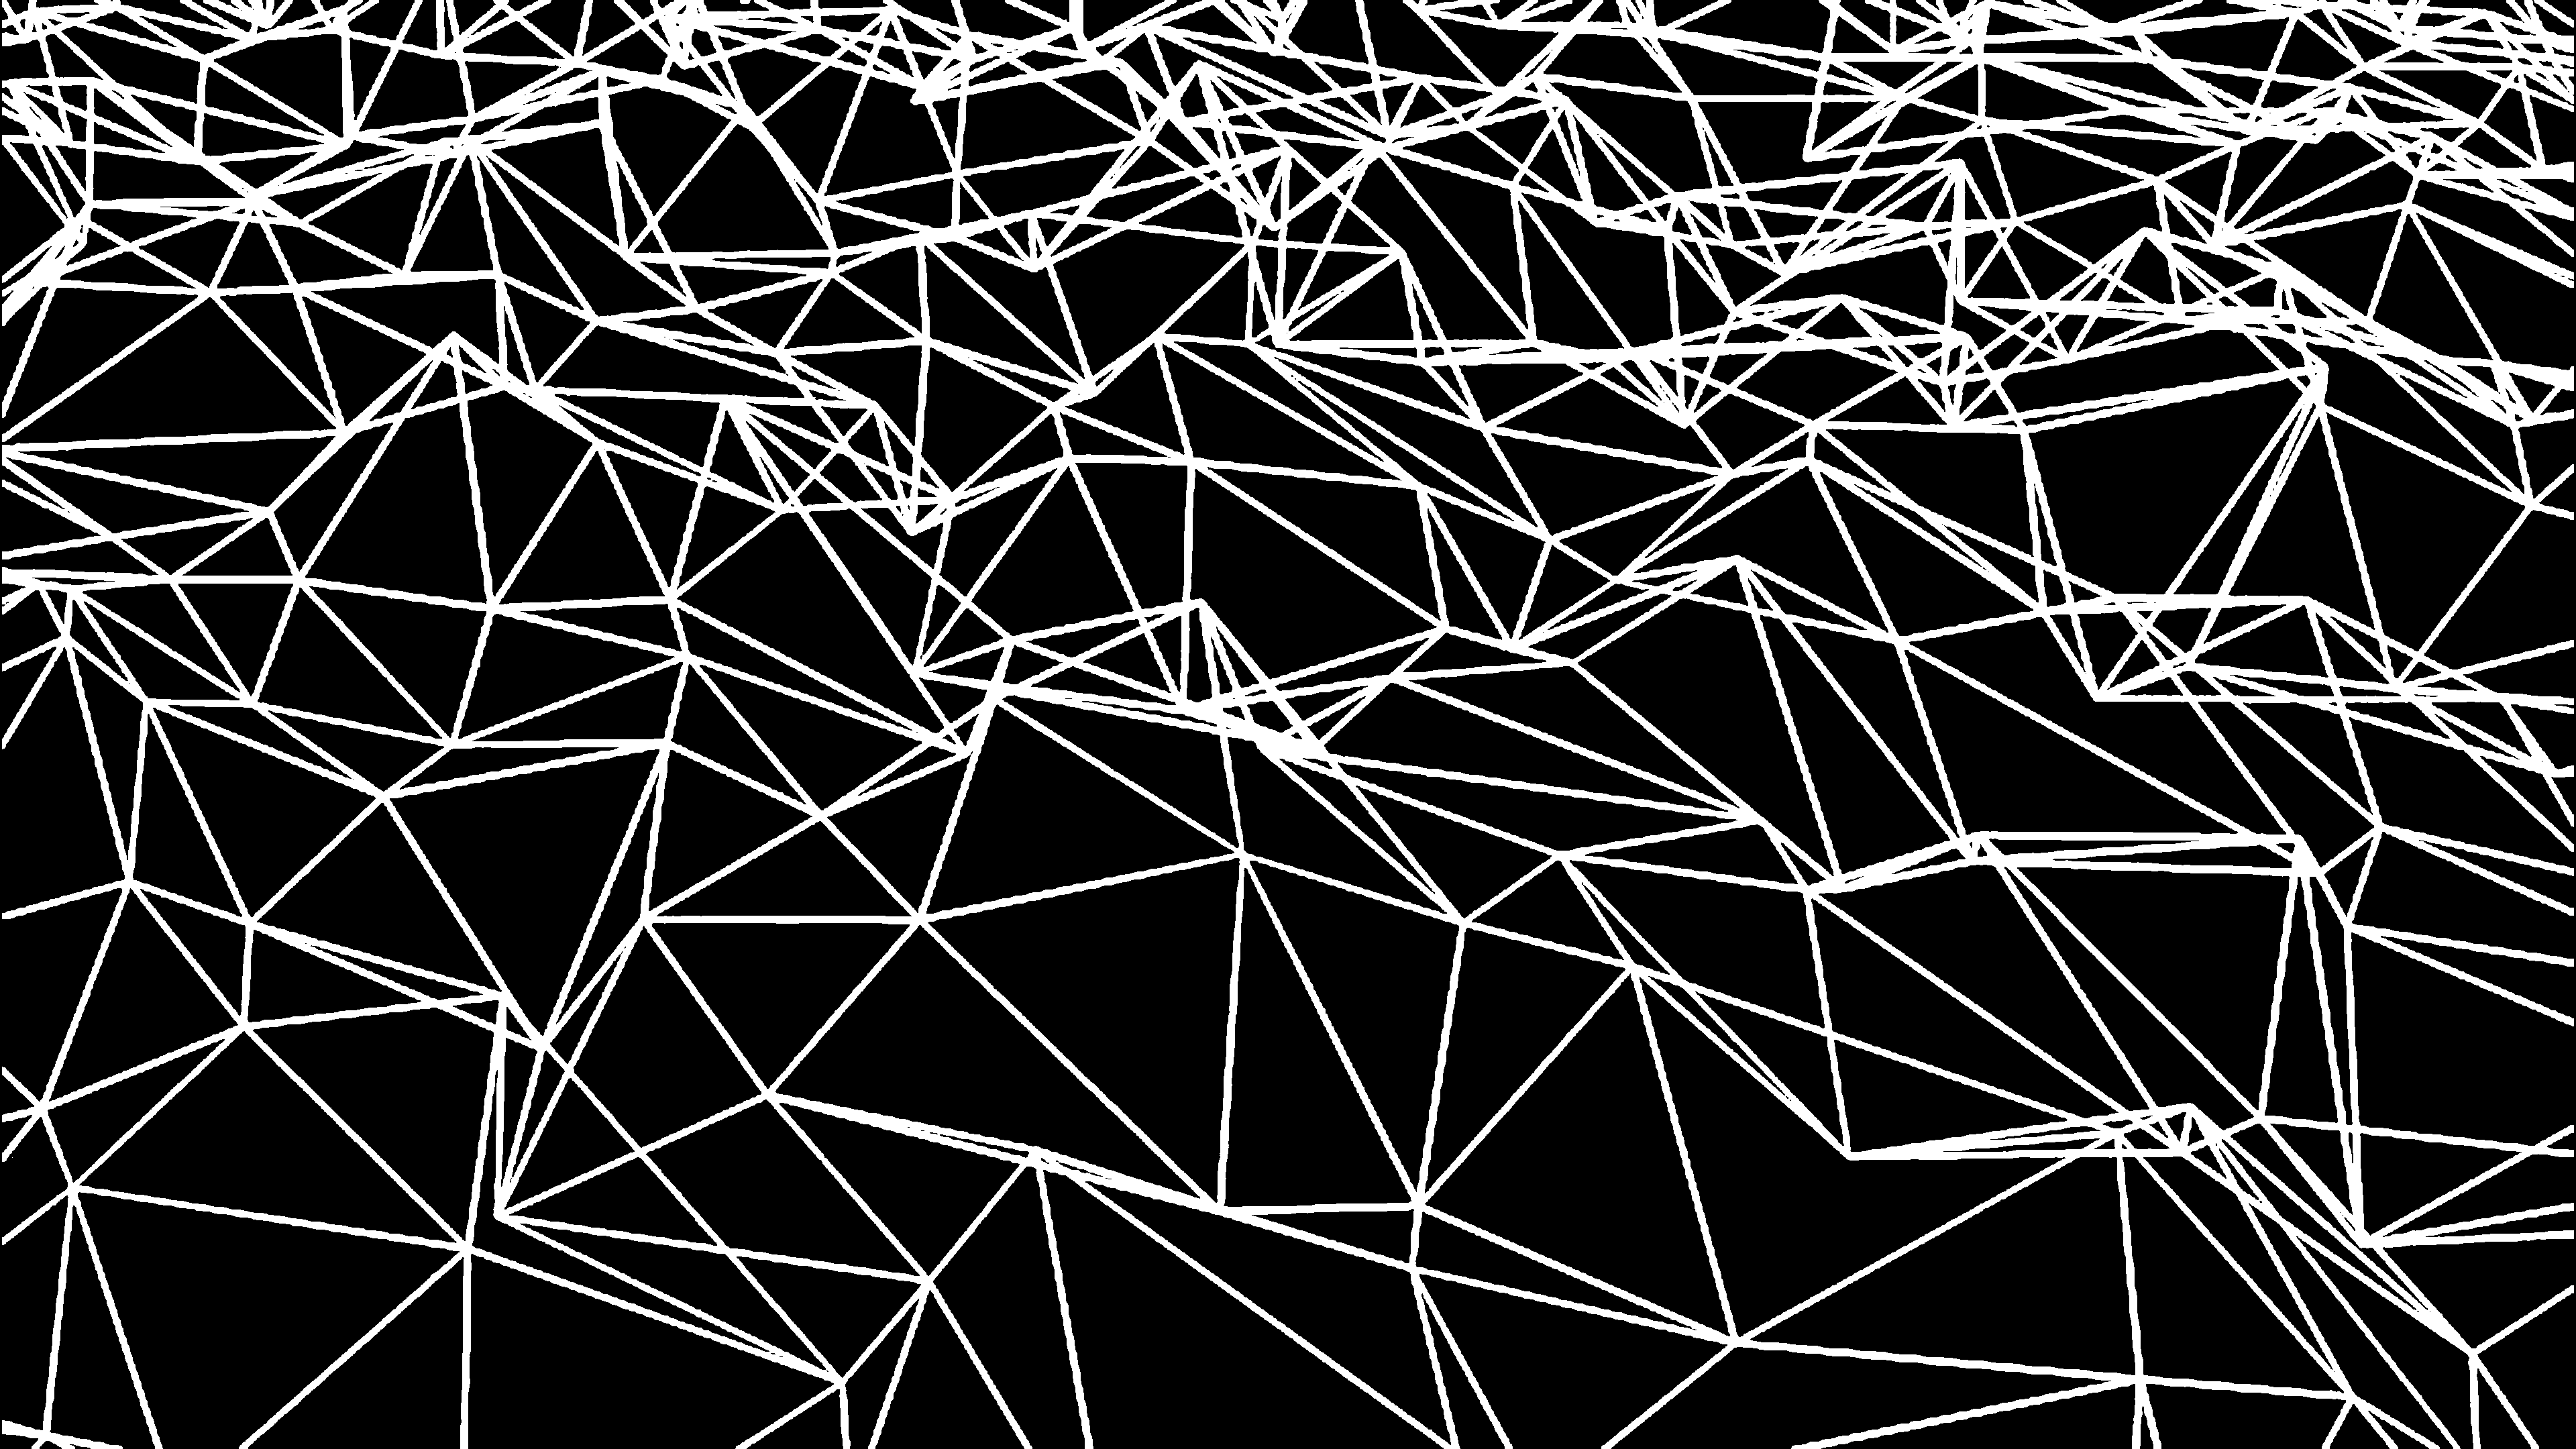

In [26]:
my_secret_img = imagenception(os.path.join("images", "my_secret.png"))
my_secret_img

## Ejercicio 2: Analizando la Felicidad

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [27]:
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [28]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(os.path.join("data", "world-happiness", f"{year}.csv"))
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

In [29]:
df_dict[2016].head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [30]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist() + ["Year"]
print(intersection_columns)

['Country', 'Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity', 'Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__ Se utiliza la función reduce, que acorta una lista de arreglos a un solo arreglo según un criterio, el cual en este caso es 'np.intersect1d', es decir, elige los elementos en común de estos arreglos.Para obtener la lista con los nombres de las columnas se lee cada archivo en el diccionario df_dict de manera:'df_i.columns.values for df_i in df_dict.values()' y se ponen en una lista. Luego, el resultado de reduce es transformado de un arreglo a una lista con 'tolist()' y finalmente se le añade "Year".

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
    - Nota que en la documentación de `pd.concat` puedes entregar como argumento directamente un diccionario.
    - No ordenes los _axis_ (ver documentación).
    - Los nombres de los _levels_ para los multi-index resultante deben ser `["Year", "drop_me"]`.
* Aplica el método `drop_level` con tal de eliminar el nivel del multi-index llamado `drop_me`.
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [31]:
happiness = (
    pd.concat(df_dict, sort=False, names=["Year","drop_me"])
    .droplevel("drop_me")
    .reset_index()
    .loc[:,intersection_columns]
    .rename(columns=lambda x: x.replace(" ", "_").replace("(", "").replace(")", "").lower())
)
happiness.head()

country  dystopia_residual  economy_gdp_per_capita   family  freedom  \
0  Switzerland            2.51738                 1.39651  1.34951  0.66557   
1      Iceland            2.70201                 1.30232  1.40223  0.62877   
2      Denmark            2.49204                 1.32548  1.36058  0.64938   
3       Norway            2.46531                 1.45900  1.33095  0.66973   
4       Canada            2.45176                 1.32629  1.32261  0.63297   

   generosity  happiness_rank  happiness_score  health_life_expectancy  \
0     0.29678               1            7.587                 0.94143   
1     0.43630               2            7.561                 0.94784   
2     0.34139               3            7.527                 0.87464   
3     0.34699               4            7.522                 0.88521   
4     0.45811               5            7.427                 0.90563   

   trust_government_corruption  year  
0                      0.41978  2015  
1                      0.14145  2015  
2                      0.48357  2015  
3                      0.36503  2015  
4                      0.32957  2015

### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [32]:
happiness.describe(include="all").fillna("").T

count unique       top freq      mean       std  \
country                       470    166  Mongolia    3                       
dystopia_residual             470                         2.09272  0.565772   
economy_gdp_per_capita        470                         0.92783  0.415584   
family                        470                        0.990347  0.318707   
freedom                       470                        0.402828  0.150356   
generosity                    470                        0.242241  0.131543   
happiness_rank                470                         78.8298   45.2814   
happiness_score               470                         5.37073     1.137   
health_life_expectancy        470                        0.579968  0.240161   
trust_government_corruption   470                         0.13479  0.111313   
year                          470                         2015.99  0.816907   

                                 min        25%        50%       75%       max  
country                                                                         
dystopia_residual            0.32858    1.73798    2.09464   2.45557   3.83772  
economy_gdp_per_capita             0   0.605292   0.995439   1.25244   1.87077  
family                             0      0.793    1.02567   1.22875   1.61057  
freedom                            0   0.297615   0.418347   0.51685   0.66973  
generosity                         0   0.152831    0.22314  0.315824  0.838075  
happiness_rank                     1         40         79       118       158  
happiness_score                2.693      4.509     5.2825   6.23375     7.587  
health_life_expectancy             0   0.402301   0.630053  0.768298   1.02525  
trust_government_corruption        0  0.0597774  0.0995017  0.173161   0.55191  
year                            2015       2015       2016      2017      2017

¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [33]:
all_years = reduce(np.intersect1d, [df_i['Country'] for df_i in df_dict.values()]).tolist()
not_all_years= reduce(np.setdiff1d, [happiness['country'],all_years ]).tolist()
print(len(not_all_years),not_all_years)

20 ['Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Hong Kong', 'Hong Kong S.A.R., China', 'Laos', 'Lesotho', 'Mozambique', 'Namibia', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland Region', 'Somaliland region', 'South Sudan', 'Suriname', 'Swaziland', 'Taiwan', 'Taiwan Province of China']


__Respuesta:__  20 países no tienen mediciones para los 3 años, son: 'Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Hong Kong', 'Hong Kong S.A.R., China', 'Laos', 'Lesotho', 'Mozambique', 'Namibia', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland Region', 'Somaliland region', 'South Sudan', 'Suriname', 'Swaziland', 'Taiwan', 'Taiwan Province of China'. 

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [34]:
bad_country_names_dict = {"Hong Kong S.A.R., China": "Hong Kong","Taiwan Province of China": "Taiwan","Somaliland region":"Somaliland Region"}
happiness = happiness.assign(country =lambda x: x["country"].map(bad_country_names_dict).fillna(x["country"]))
for key in df_dict.keys():
     df_dict[key] = df_dict[key].assign(Country =lambda x: x["Country"].map(bad_country_names_dict).fillna(x["Country"]))

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [35]:
all_years = reduce(np.intersect1d, [df_i['Country'] for df_i in df_dict.values()]).tolist()
not_all_years= reduce(np.setdiff1d, [happiness['country'],all_years ]).tolist()
print(len(not_all_years))

15


__Respuesta:__  Luego de la modificación, quedan 15 paises sin mediciones en todos los años.

Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [36]:
happiness_table=happiness.pivot_table(
    index="year",
    columns="country",
    values="happiness_score",
    fill_value=""
)
happiness_table

country  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
year                                                                            
2015           3.575    4.959    5.605   4.033      6.574    4.350      7.284   
2016           3.360    4.655    6.355   3.866      6.650    4.360      7.313   
2017           3.794    4.644    5.872   3.795      6.599    4.376      7.284   

country  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium Belize  \
year                                                                         
2015       7.200       5.212    5.960       4.694    5.813    6.937          
2016       7.119       5.291    6.218       4.643    5.802    6.929  5.956   
2017       7.006       5.234    6.087       4.608    5.569    6.891  5.956   

country  Benin  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  \
year                                                                        
2015     3.340   5.253    5.890                   4.949     4.332   6.983   
2016     3.484   5.196    5.822                   5.163     3.974   6.952   
2017     3.657   5.011    5.823                   5.182     3.766   6.635   

country  Bulgaria  Burkina Faso  Burundi  Cambodia  Cameroon  Canada  \
year                                                                   
2015        4.218         3.587    2.905     3.819     4.252   7.427   
2016        4.217         3.739    2.905     3.907     4.513   7.404   
2017        4.714         4.032    2.905     4.168     4.695   7.316   

country Central African Republic   Chad  Chile  China  Colombia Comoros  \
year                                                                      
2015                       3.678  3.667  6.670  5.140     6.477   3.956   
2016                              3.763  6.705  5.245     6.481   3.956   
2017                       2.693  3.936  6.652  5.273     6.357           

country  Congo (Brazzaville)  Congo (Kinshasa)  Costa Rica  Croatia  Cyprus  \
year                                                                          
2015                   3.989             4.517       7.226    5.759   5.689   
2016                   4.236             4.272       7.087    5.488   5.546   
2017                   4.291             4.280       7.079    5.293   5.621   

country  Czech Republic  Denmark Djibouti  Dominican Republic  Ecuador  Egypt  \
year                                                                            
2015              6.505    7.527    4.369               4.885    5.975  4.194   
2016              6.596    7.526                        5.155    5.976  4.362   
2017              6.609    7.522                        5.230    6.008  4.735   

country  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  \
year                                                                       
2015           6.130    5.429     4.512    7.406   6.575  3.896    4.297   
2016           6.068    5.517     4.508    7.413   6.478  4.121    4.252   
2017           6.003    5.611     4.460    7.469   6.442  4.465    4.286   

country  Germany  Ghana  Greece  Guatemala  Guinea  Haiti  Honduras  \
year                                                                  
2015       6.750  4.633   4.857      6.123   3.656  4.518     4.788   
2016       6.994  4.276   5.033      6.324   3.607  4.028     4.871   
2017       6.951  4.120   5.227      6.454   3.507  3.603     5.181   

country  Hong Kong  Hungary  Iceland  India  Indonesia   Iran   Iraq  Ireland  \
year                                                                            
2015         5.474    4.800    7.561  4.565      5.399  4.686  4.677    6.940   
2016         5.458    5.145    7.501  4.404      5.314  4.813  4.575    6.907   
2017         5.472    5.324    7.504  4.315      5.262  4.692  4.497    6.977   

country  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  \
year                                                        

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  Podría sacar rápidamente la información sobre _happines score_ en los años para algún país en especifico, pero al ser muchos no serviría para nada más, por lo que no siempre es útil pivotear una tabla. 

En promedio, ¿Cuáles son los tres países con el mejor ranking de felicidad?

In [37]:
happiness.pivot_table(
    index="year",
    columns="country",
    values="happiness_rank",
    fill_value=""
).describe(include="all").T["mean"].sort_values()

country
Denmark                    2
Switzerland          2.33333
Iceland              2.66667
Norway                     3
Finland              5.33333
                      ...   
Somalia                  NaN
Somaliland Region        NaN
South Sudan              NaN
Suriname                 NaN
Swaziland                NaN
Name: mean, Length: 163, dtype: object

__Respuesta:__  Los paises con mejor ranking de felicidad promedio son los que tienen el menor _happiness rank_ promedio: Denmark, Switzerland y Iceland. 

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad? ¿Son distintos a los con mejor ranking en promedio?

In [ ]:
happiness.pivot_table(
    index="year",
    columns="country",
    values="happiness_score",
    fill_value=""
).describe(include="all").T["mean"].sort_values(ascending=False)

__Respuesta:__  Los tres paises con mayor _happiness score_ son Switzerland, Denmark y Iceland. Son iguales a los con mejor ranking promedio pero en otro orden. 

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [ ]:
hap_mean_factors =happiness.drop(columns= "happiness_rank").groupby("year").mean()
hap_mean_factors

Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [ ]:
print(" 2015:",2.098977/5.375734 *100,"\n 2016:", 2.325807/5.382185 *100, "\n 2017:",1.850238/5.354019 *100 )

__Resuesta:__
* 2015:  _dystopia residual_ en un 39%
* 2016:  _dystopia residual_ en un 43%
* 2017:  _dystopia residual_ en un 34%

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [ ]:
suicide = pd.read_csv(os.path.join("data", "suicide_rates.csv"))
suicide.head()

La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [ ]:
suicide.describe(include="all").fillna("").T

Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [ ]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(["year","country"])
    .agg( 
        {'suicides_no': "sum",'population':"sum"}, axis="columns"
    )
    .reset_index()
    .assign(
        suicides_ratio_100k=lambda x: x["suicides_no"]/x["population"]*100000,
        suicides_rank=lambda x: x.groupby('year')['suicides_ratio_100k'].rank(method='max',ascending=False)
    )
)
suicides_agg

Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [ ]:
hap_sui = pd.merge(happiness, suicides_agg, how='inner', on=['year', 'country'])
hap_sui.head()

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [ ]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr()

__Respuesta:__  El indice de pearson de correlación lineal es de 0.038896, por lo que estan muy poco relacionados linealmente positivo.

¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [ ]:
hap_sui.groupby('year').corr().reset_index('year')['happiness_rank']['suicides_rank']

__Respuesta:__  la relación lineal en 2015 es de 0.101215 y en 2016 de 0.022048

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [ ]:
hap_sui.loc[:, ["happiness_score", "suicides_ratio_100k"]].corr()

In [ ]:
hap_sui.groupby('year').corr().reset_index('year')['happiness_score']['suicides_ratio_100k']

__Respuesta:__  En efecto, cambian: para todos los años la relación es de 0.021455 (menor), para 2015 es de 0.035262 (menor) y para 2016 es de 0.025924 (mayor), pero aun asi son muy pequeñas para considerar una relacion lineal.

## Retroalimentación sobre el curso

Esta sección **no será evaluada** pero nos permitirá obtener retroalimentación de las clases, tareas y laboratorios. Puedes ser completamente sincero, pues no será parte de la evaluación de esta tarea (ni de futuras).

* **1**. ¿Aproximadamente cuánto tiempo, en horas, te tomó terminar la tarea?
    - R: 15 hrs

* **2**. ¿Qué tan interesante es esta tarea (0-100)?

    - R: 80

* **3**. ¿Qué tan difícil fue esta tarea (0-100)? Siendo 0 complemente trivial, 100 completamente imposible y 50 siendo una complejidad apropiada.

    - R: 60

* **4**. Evalúa las siguientes clases del módulo 2, en escala 0 a 100 (siendo 0 completamente inútil y 100 información indispensable). Puedes incluir comentarios adicionales, si lo deseas.

    - **Clase 1**: Computación Científica
        - R: *30*

    - **Clase 2**: Manipulación de Datos
        - R: *80*

    - **Clase 3**: Combinando Datos
        - R: *90*

    - **Clase 4**: Agrupando Datos
        - R: *90*

    - **Clase 5**: Análisis Exploratorio de Datos
        - R: *40*
    
    - **Clase 6**: Desarrollo de Algoritmos
        - R: *20*

* **5**. Tienes algún comentario respecto al curso respecto a esta fecha.

    - R: Hasta el momento las clases son excelentes y se nota que estan bien preparadas. Sobre las evaluaciones, la modalidad online funciona mucho mejor que la presencial en mi experiencia, ya que no tengo buena memoria con los codigos por lo que requiero de más tiempo para realizar los laboratorios. En clases era bastante estresante por el margen de tiempo, pero ahora es incluso gratificante resolver un laboratorio. 